### Вариант 25
q1 = 60 - 2 * p1  
q2 = 42 - 1 * p2  
C = 2 * (q1 ** 2) + 5 * q1 * q2 + 3 * (q2 ** 2) + 4  
P = p1 * q1 + p2 * q2 - C  

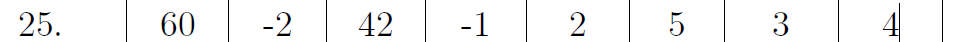

In [1]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
while True:
    try:
        q1 = input("Введите выражение для q1: ")
        q2 = input("Введите выражение для q2: ")
        C = input("Введите выражение для C: ") 
        P = input("Введите выражение для P: ")
        q1_S = sympify(q1)
        q2_S = sympify(q2)
        C_S = sympify(C)
        P_S = sympify(P)
        break
    except Exception:
        print("Ошибка ввода!")

Введите выражение для q1: 60 - 2 * p1
Введите выражение для q2: 42 - 1 * p2
Введите выражение для C: 2 * (q1 ** 2) + 5 * q1 * q2 + 3 * (q2 ** 2) + 4
Введите выражение для P: p1 * q1 + p2 * q2 - C


In [3]:
C_S = C_S.subs([("q1", q1), ("q2", q2)])
P_S = P_S.subs([("q1", q1), ("q2", q2), ("C", C_S)])
print(q1_S)
print()
print(q2_S)
print()
print(C_S)
print()
print(P_S)

60 - 2*p1

42 - p2

3*(42 - p2)**2 + 5*(42 - p2)*(60 - 2*p1) + 2*(60 - 2*p1)**2 + 4

p1*(60 - 2*p1) + p2*(42 - p2) - 3*(42 - p2)**2 - 5*(42 - p2)*(60 - 2*p1) - 2*(60 - 2*p1)**2 - 4


In [4]:
result = optimize.minimize(lambda x: -lambdify(["p1", "p2"], P_S)(x[0], x[1]), x0=(0, 0), method="BFGS")
result

      fun: -109.99999999999982
 hess_inv: array([[ 0.13333335, -0.16666668],
       [-0.16666668,  0.33333329]])
      jac: array([9.53674316e-07, 1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([28.99999981, 38.00000037])

In [5]:
p1_max, p2_max, extremum = int(result.x[0] + (0.5 if result.x[0] > 0 else -0.5)), int(result.x[1] + (0.5 if result.x[1] > 0 else -0.5)), -result.fun

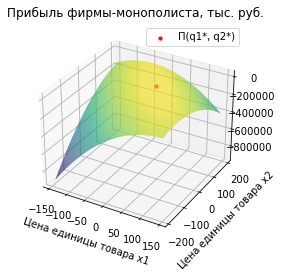

In [63]:
%lprun -f foo foo()
def foo():
    plt.figure() 
    ax = plt.axes(projection='3d') 
    x = np.linspace(-p1_max * 5, p1_max * 5, p1_max*10) 
    y = np.linspace(-p2_max * 5, p2_max * 5, p2_max*10) 
    X, Y = np.meshgrid(x, y) 
    Z = lambdify(["p1", "p2"], P_S)(X, Y) 
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis') 
    ax.scatter(p1_max, p2_max, extremum, s=10, color="red", label="П(q1*, q2*)") 
    plt.title("Прибыль фирмы-монополиста, тыс. руб.") 
    plt.xlabel("Цена единицы товара x1") 
    plt.ylabel("Цена единицы товара x2") 
    plt.legend() 
    plt.show()

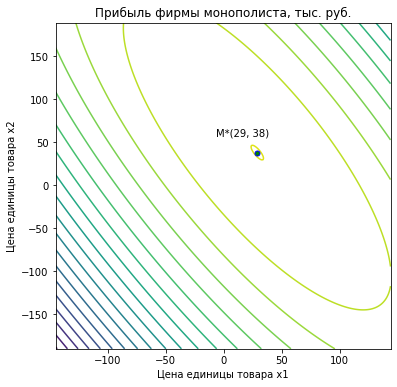

In [24]:
x, y = np.mgrid[-5 * p1_max:p1_max * 5, -5 * p2_max:p2_max * 5]
z = lambdify(["p1", "p2"], P_S)(x, y)

fig, ax = plt.subplots()
ax.contour(x, y, z, levels=20)
fig.set_figwidth(6)
fig.set_figheight(6)
plt.title("Прибыль фирмы монополиста, тыс. руб.")
plt.xlabel("Цена единицы товара x1")
plt.ylabel("Цена единицы товара x2")
plt.plot(p1_max, p2_max, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="green")
plt.text(p1_max + 10,p2_max + 20,f'M*{p1_max, p2_max}',horizontalalignment='right')
plt.show()

In [23]:
print("Результаты: ")
print(f"Оптимальный план (q1*;q2*) = {p1_max, p2_max}, Максимальная прибыль П(q1*;q2*) = {extremum} ")

Результаты: 
Оптимальный план (q1*;q2*) = (29, 38), Максимальная прибыль П(q1*;q2*) = 109.99999999999982 
